<a href="https://colab.research.google.com/github/KavindaRajapaksha/DeepLearning/blob/main/RegressionModelBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavindasrajapaksha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 5.65MB/s]

In [7]:
data=pd.read_csv("random-linear-regression/test.csv")

In [9]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [10]:
data.shape

(300, 2)

In [11]:
X=data['x']
Y=data['y']

In [12]:
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


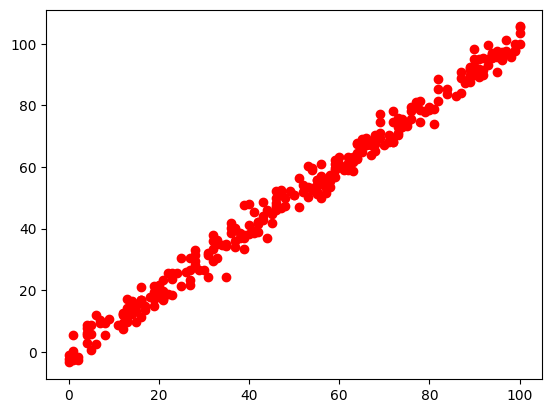

In [13]:
plt.scatter(X,Y,c='r')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,X_test.shape

((240,), (60,))

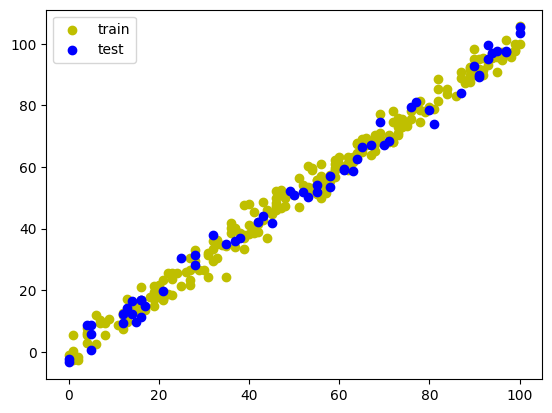

In [16]:
plt.scatter(X_train,Y_train,c='y',label='train')
plt.scatter(X_test,Y_test,c='b',label='test')
plt.legend()
plt.show()